In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
print("OpenCV version:", cv.__version__)

OpenCV version: 4.10.0


In [2]:
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/data/messi5.jpg -O messi5.jpg
import os
if not os.path.exists('messi5.jpg'):
    print("messi5.jpg download failed. Please upload another image or change file name.")
else:
    print("messi5.jpg downloaded.")

messi5.jpg downloaded.


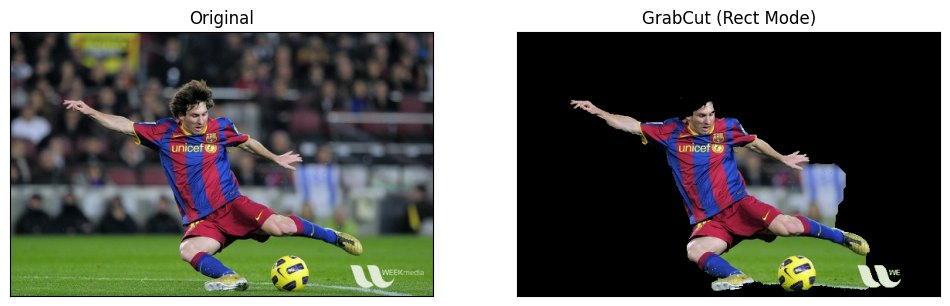

In [3]:
img_path = 'messi5.jpg'
img = cv.imread(img_path)
if img is None:
    raise FileNotFoundError('Image not found.')

mask = np.zeros(img.shape[:2], np.uint8)

bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

rect = (50, 50, 450, 290)

cv.grabCut(
    img, mask, rect, bgdModel, fgdModel,
    5, mode=cv.GC_INIT_WITH_RECT
    )

mask2 = np.where(
    (mask == 2) | (mask == 0),
    0,
    1
).astype('uint8')

result = img * mask2[:, :, np.newaxis]

# 시각화
plt.figure(figsize=(12,5))
plt.subplot(1,2,1), plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))
plt.title('GrabCut (Rect Mode)'), plt.xticks([]), plt.yticks([])
plt.show()